In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# This is a data set about the number of bikes shared or rented in each month.  
import pandas as pd 
bike = pd.read_csv("bike.csv")
sub_bike = bike.loc[:,("mnth","cnt")]

In [2]:
torch.set_grad_enabled(True)

#   The number of bikes bikes rented ranges from 22 to 8714.To bring it between 0 and 1 divide it by 8714 and 
#   converting it to a Tensor. 

from functools import partial
import numpy as np
list1 = sub_bike["cnt"].tolist()
wow = [t/8714 for t in list1 ]
n_list = partial(round,ndigits=4)
normalised1 = list(map(n_list,wow))
normalised2 = np.asarray(normalised1)
normalised3 = normalised2.reshape(731,1)
normalised_lables = torch.Tensor(normalised3)

# Taking the one hot encoding of the month column to multiply in the embedding matrix and converting to Tensor. 

import sklearn as sk
from sklearn.preprocessing import OneHotEncoder as ohr
OH = ohr(sparse=False)
OHE1 = OH.fit_transform(sub_bike[["mnth"]])
OHE = torch.Tensor(OHE1)

/Users/akshaytiwari/Downloads/anaconda3/envs/latest/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net1(nn.Module): 
    def __init__(self): 
        super(Net1, self).__init__()
        
        self.fc = nn.Linear(12,3)
        self.fc1 = nn.Linear(3,50)
        self.fc2 = nn.Linear(50,15)
        self.fc3 = nn.Linear(15,1)
        
    def forward(self,t):
                              # Embedding
        t=t 
        u = self.fc(t) 
                              # Hidden Layer 3,50
        t = self.fc1(u)
        #t = F.dropout(t)
        t = torch.relu(t)

                              # Hidden layer 50, 15
        t = self.fc2(t)
        #t = F.dropout(t)
        t = torch.relu(t)

                              # For converting 15 to 1 
        t = self.fc3(t)
        #t = torch.sigmoid(t)
        
        return t
    

    
layer = Net1()

layer(OHE[1,:])

tensor([0.1386], grad_fn=<AddBackward0>)

In [4]:
from torch import optim as optim
optimiser = optim.Adam(layer.parameters(),lr=0.001)
batch_OHE = torch.utils.data.DataLoader(OHE,batch_size=40)
batch_lables = torch.utils.data.DataLoader(normalised_lables,batch_size=40)

# for epoch in range(200):


for epoch in range(100):
    
    total_loss = 0
    pair = []
    for i,j in zip(batch_OHE,batch_lables):
                
        pred = layer(i)
        
        loss = F.mse_loss(pred,j)

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()


        total_loss +=  loss.item()
        pair.append(i)
        pair.append(j)
    print ("epoch",epoch,"loss:",total_loss)

epoch 0 loss: 2.9170721266418695
epoch 1 loss: 2.0649812552146614
epoch 2 loss: 1.3892514640465379
epoch 3 loss: 1.0221229260787368
epoch 4 loss: 0.9505549292080104
epoch 5 loss: 0.9657489252276719
epoch 6 loss: 0.9697454739362001
epoch 7 loss: 0.961469960398972
epoch 8 loss: 0.9502082881517708
epoch 9 loss: 0.9384236107580364
epoch 10 loss: 0.9265739140100777
epoch 11 loss: 0.9144259169697762
epoch 12 loss: 0.8999064615927637
epoch 13 loss: 0.8849728237837553
epoch 14 loss: 0.8679515195544809
epoch 15 loss: 0.8512656791135669
epoch 16 loss: 0.8349848766811192
epoch 17 loss: 0.8184281617868692
epoch 18 loss: 0.8025473249144852
epoch 19 loss: 0.7861140703316778
epoch 20 loss: 0.7690401268191636
epoch 21 loss: 0.755650773178786
epoch 22 loss: 0.7412965055555105
epoch 23 loss: 0.7306268191896379
epoch 24 loss: 0.716613479424268
epoch 25 loss: 0.7069347687065601
epoch 26 loss: 0.6970325675792992
epoch 27 loss: 0.6862670150585473
epoch 28 loss: 0.6805952796712518
epoch 29 loss: 0.6688858615

<IPython.core.display.Javascript object>


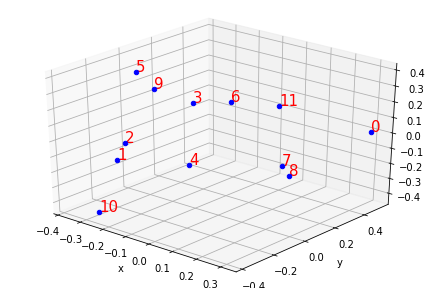

In [5]:
#this is a 3D graph and it is expected that months 5,6,7,8,9 should be grouped together and 1,2 together. 

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure
%matplotlib inline  
%matplotlib notebook


#m=rand(3,3) m is an array of (x,y,z) coordinate triplets

fig = figure()
ax = Axes3D(fig)
fg1 = layer.fc.weight
fg2 = fg1.detach().numpy().reshape(12,3)


for i in range(12):
    #plot each point + it's index as text above
    ax.scatter(fg2[i,0],fg2[i,1],fg2[i,2],color='b') 
    ax.text(fg2[i,0],fg2[i,1],fg2[i,2],  '%s' % (str(i)), size=15, zorder=1,color='r') 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
pyplot.show()


<IPython.core.display.Javascript object>


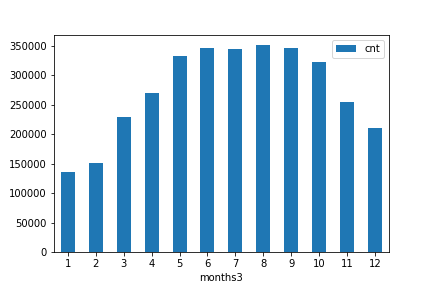

In [6]:
# i expect the months with similar sales to learn embeddings which are close together.

group_sub_bike = sub_bike.groupby(["mnth"]).sum()
months3 = [1,2,3,4,5,6,7,8,9,10,11,12]
group_sub_bike.insert(1,"months3",months3,True)
group_sub_bike.plot.bar("months3","cnt",rot=0)